In [2]:
import os
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

import matplotlib.pyplot as plt

In [3]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    all_words = []       
    for mail in emails:  
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2:
                    words = line.split()
                    all_words += words
    #zählen der Wörter
    dictionary = Counter(all_words)
    list_to_remove = list(dictionary)
    for item in list_to_remove:
        #entfernt sonderzeichen und 1 zeichen
        if item.isalpha() == False: 
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(700)
    return dictionary

In [4]:
def extract_features(mail_dir): 
    files = [os.path.join(mail_dir,fi) for fi in sorted(os.listdir(mail_dir))]
    features_matrix = np.zeros((len(files),700))
    docID = 0;
    for fil in files:
      with open(fil) as fi:
        for i,line in enumerate(fi):
          if i == 2:
            words = line.split()
            for word in words:
              wordID = 0
              for i,d in enumerate(dictionary):
                if d[0] == word:
                  wordID = i
                  features_matrix[docID,wordID] = words.count(word)
        docID = docID + 1     
    return features_matrix

In [5]:
# Create a dictionary of words with its frequency
train_dir = '/Users/dariusazarfar/Downloads/ling-spam/train-mails'
dictionary = make_Dictionary(train_dir)
print(dictionary)


[('order', 1414), ('address', 1293), ('report', 1216), ('mail', 1127), ('send', 1079), ('language', 1072), ('email', 1051), ('program', 1001), ('our', 987), ('list', 935), ('one', 917), ('name', 878), ('receive', 826), ('money', 788), ('free', 762), ('work', 755), ('information', 677), ('business', 654), ('please', 652), ('university', 595), ('us', 564), ('day', 556), ('follow', 544), ('internet', 520), ('over', 511), ('http', 479), ('check', 472), ('call', 469), ('each', 466), ('include', 452), ('com', 448), ('linguistic', 442), ('number', 423), ('want', 420), ('letter', 419), ('need', 418), ('many', 412), ('here', 397), ('market', 395), ('start', 390), ('even', 386), ('fax', 383), ('form', 380), ('most', 377), ('first', 373), ('web', 366), ('service', 363), ('interest', 362), ('software', 352), ('remove', 349), ('read', 347), ('those', 345), ('week', 344), ('every', 332), ('credit', 329), ('ll', 326), ('site', 320), ('edu', 318), ('much', 318), ('english', 318), ('product', 317), ('b

In [6]:
# Prepare feature vectors per training mail and its labels

train_labels = np.zeros(702)
train_labels[351:702] = 1
train_matrix = extract_features(train_dir)
print(train_matrix)

[[ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


In [7]:
# Training SVM and Naive bayes classifier and its variants

model1 = LinearSVC()
model2 = MultinomialNB()

model1.fit(train_matrix,train_labels)
model2.fit(train_matrix,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
test_dir = '/Users/dariusazarfar/Downloads/ling-spam/test-mails'
test_matrix = extract_features(test_dir)
test_labels = np.zeros(260)
test_labels[130:260] = 1

In [9]:
result1 = model1.predict(test_matrix)
result2 = model2.predict(test_matrix)

cfm2 = metrics.confusion_matrix(test_labels,result2)

#True Positive
tp = cfm2[0][0]
#FalsePositive
fp = cfm2[0][1]
#FalseNegative
fn = cfm2[1][0]
#TrueNegative
tn = cfm2[1][1]

print('Ergebnisse von Model 2: Naive Bayes')
#print(confusion_matrix(test_labels,result1))
print(cfm2)

klassifikationsfehler = (fp + fn)/(tp+fp+tn+fn)
print('Klassifikationsfehler: ', klassifikationsfehler)
guete = (tp + tn)/(tp+fp+tn+fn)
print('Güte: ', guete)

Ergebnisse von Model 2: Naive Bayes
[[128   2]
 [ 13 117]]
Klassifikationsfehler:  0.0576923076923
Güte:  0.942307692308


In [10]:
print(metrics.classification_report(test_labels, result2, target_names=['Ham','Spam']))

             precision    recall  f1-score   support

        Ham       0.91      0.98      0.94       130
       Spam       0.98      0.90      0.94       130

avg / total       0.95      0.94      0.94       260



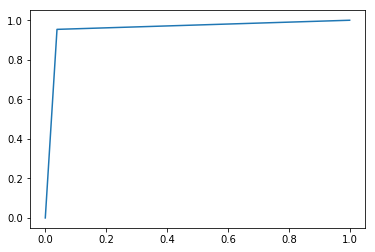

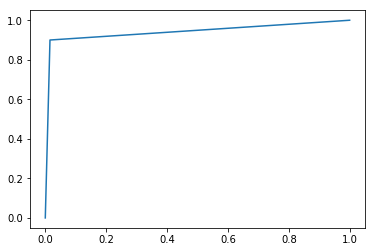

In [11]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(test_labels, result1, pos_label=0)

# Print ROC curve
plt.plot(tpr1,fpr1)
plt.show()

fpr2, tpr2, thresholds2 = metrics.roc_curve(test_labels, result2, pos_label=0)

# Print ROC curve
plt.plot(tpr2,fpr2)
plt.show() 